In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [110]:
bike_data = pd.read_csv('totalData.csv')
bike_data = bike_data.fillna(0)
bike_data

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Berri1,Maisonneuve_2,Maisonneuve_1
0,2009.0,1.0,1.0,-14.7,-19.9,-17.3,0.0,0.0,-23.125000,59.916667,28.291667,17.375000,-25.875000,29.0,35.0,20.0
1,2009.0,1.0,2.0,-11.3,-16.2,-13.8,1.0,0.0,-17.029167,76.250000,7.083333,12.250000,-19.458333,19.0,22.0,3.0
2,2009.0,1.0,3.0,-8.1,-13.0,-10.6,0.0,0.0,-15.441667,67.958333,28.208333,22.541667,-18.708333,24.0,22.0,12.0
3,2009.0,1.0,4.0,-8.3,-13.8,-11.1,0.0,0.0,-16.366667,66.958333,25.333333,13.375000,-17.875000,24.0,15.0,8.0
4,2009.0,1.0,5.0,-1.9,-9.2,-5.6,0.0,0.0,-10.387500,71.708333,24.500000,17.291667,-11.541667,120.0,141.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,2019.0,12.0,27.0,3.4,-4.4,-0.5,5.9,2.0,-2.087500,91.666667,13.458333,11.791667,-4.208333,93.0,0.0,35.0
4013,2019.0,12.0,28.0,4.0,-1.3,1.3,0.0,2.0,-1.595833,75.916667,25.000000,16.416667,-0.166667,163.0,0.0,89.0
4014,2019.0,12.0,29.0,0.9,-2.7,-0.9,0.0,2.0,-5.262500,73.458333,12.958333,10.875000,-3.791667,147.0,0.0,93.0
4015,2019.0,12.0,30.0,-0.7,-3.9,-2.3,13.4,2.0,-5.233333,81.083333,5.041667,20.041667,-8.000000,128.0,0.0,48.0


In [111]:
bike_data = bike_data.drop(labels=['Year', 'Month', 'Day'],axis=1)
bike_data

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Berri1,Maisonneuve_2,Maisonneuve_1
0,-14.7,-19.9,-17.3,0.0,0.0,-23.125000,59.916667,28.291667,17.375000,-25.875000,29.0,35.0,20.0
1,-11.3,-16.2,-13.8,1.0,0.0,-17.029167,76.250000,7.083333,12.250000,-19.458333,19.0,22.0,3.0
2,-8.1,-13.0,-10.6,0.0,0.0,-15.441667,67.958333,28.208333,22.541667,-18.708333,24.0,22.0,12.0
3,-8.3,-13.8,-11.1,0.0,0.0,-16.366667,66.958333,25.333333,13.375000,-17.875000,24.0,15.0,8.0
4,-1.9,-9.2,-5.6,0.0,0.0,-10.387500,71.708333,24.500000,17.291667,-11.541667,120.0,141.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,3.4,-4.4,-0.5,5.9,2.0,-2.087500,91.666667,13.458333,11.791667,-4.208333,93.0,0.0,35.0
4013,4.0,-1.3,1.3,0.0,2.0,-1.595833,75.916667,25.000000,16.416667,-0.166667,163.0,0.0,89.0
4014,0.9,-2.7,-0.9,0.0,2.0,-5.262500,73.458333,12.958333,10.875000,-3.791667,147.0,0.0,93.0
4015,-0.7,-3.9,-2.3,13.4,2.0,-5.233333,81.083333,5.041667,20.041667,-8.000000,128.0,0.0,48.0


array([[<AxesSubplot:title={'center':'Maisonneuve_1'}>]], dtype=object)

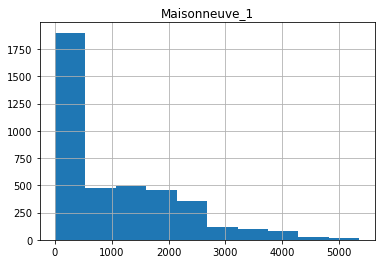

In [113]:
bike_data.hist(column="Maisonneuve_1")

In [114]:
# Exclude outliers 
# two accuracies: large bins + small bins/many bins

bike_data = bike_data.assign(Berri1=pd.cut(bike_data['Berri1'], 
                               bins=[-100, 100, 500, 1000, 2000, 4000, 8000, 1000000], 
                               labels=['0-100', 
                                       '100-500', 
                                       '500-1000', 
                                       '1000-2000', 
                                       '2000-4000', 
                                       '4000-8000', 
                                       '8000+']))
bike_data = bike_data.assign(Maisonneuve_2=pd.cut(bike_data['Maisonneuve_2'], 
                               bins=[-100, 100, 500, 1000, 2000, 4000, 8000, 1000000], 
                               labels=['0-100', 
                                       '100-500', 
                                       '500-1000', 
                                       '1000-2000', 
                                       '2000-4000', 
                                       '4000-8000', 
                                       '8000+']))
bike_data = bike_data.assign(Maisonneuve_1=pd.cut(bike_data['Maisonneuve_1'], 
                               bins=[-100, 100, 500, 1000, 2000, 4000, 8000, 1000000], 
                               labels=['0-100', 
                                       '100-500', 
                                       '500-1000', 
                                       '1000-2000', 
                                       '2000-4000', 
                                       '4000-8000', 
                                       '8000+']))

<AxesSubplot:>

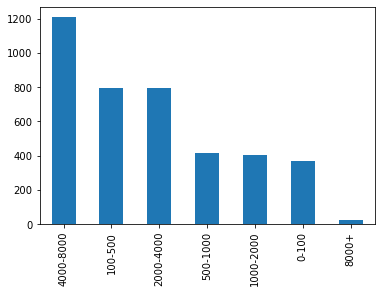

In [116]:
bike_data['Maisonneuve_2'].value_counts().plot(kind='bar')

In [117]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Max Temp (°C)        4017 non-null   float64 
 1   Min Temp (°C)        4017 non-null   float64 
 2   Mean Temp (°C)       4017 non-null   float64 
 3   Total Precip (mm)    4017 non-null   float64 
 4   Snow on Grnd (cm)    4017 non-null   float64 
 5   Dew Point Temp (°C)  4017 non-null   float64 
 6   Rel Hum (%)          4017 non-null   float64 
 7   Wind Dir (10s deg)   4017 non-null   float64 
 8   Wind Spd (km/h)      4017 non-null   float64 
 9   Wind Chill           4017 non-null   float64 
 10  Berri1               4017 non-null   category
 11  Maisonneuve_2        4017 non-null   category
 12  Maisonneuve_1        4017 non-null   category
dtypes: category(3), float64(10)
memory usage: 326.8 KB


In [118]:
list(bike_data.select_dtypes(['float64']).columns)

['Max Temp (°C)',
 'Min Temp (°C)',
 'Mean Temp (°C)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)',
 'Dew Point Temp (°C)',
 'Rel Hum (%)',
 'Wind Dir (10s deg)',
 'Wind Spd (km/h)',
 'Wind Chill']

In [119]:
columns_to_normalize = ['Max Temp (°C)',
                         'Min Temp (°C)',
                         'Mean Temp (°C)',
                         'Total Precip (mm)',
                         'Snow on Grnd (cm)',
                         'Dew Point Temp (°C)',
                         'Rel Hum (%)',
                         'Wind Dir (10s deg)',
                         'Wind Spd (km/h)',
                         'Wind Chill']

In [120]:
std_scaler = StandardScaler()
# columns_to_normalize = ['','']
features = bike_data[columns_to_normalize]
scaled_features = std_scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, index=bike_data.index)
scaled_features.columns = columns_to_normalize
bike_data[columns_to_normalize] = scaled_features
bike_data

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Berri1,Maisonneuve_2,Maisonneuve_1
0,-2.021708,-2.135575,-2.115609,-0.423706,-0.400603,-2.416624,0.104781,1.236343,0.614717,-3.635749,0-100,0-100,0-100
1,-1.742197,-1.784152,-1.800930,-0.262793,-0.400603,-1.822706,0.672608,-1.294032,-0.335874,-2.616206,0-100,0-100,0-100
2,-1.479128,-1.480218,-1.513222,-0.423706,-0.400603,-1.668036,0.384349,1.226401,1.573037,-2.497039,0-100,0-100,0-100
3,-1.495569,-1.556202,-1.558177,-0.423706,-0.400603,-1.758159,0.349584,0.883383,-0.127208,-2.364631,0-100,0-100,0-100
4,-0.969431,-1.119297,-1.063680,-0.423706,-0.400603,-1.175608,0.514717,0.783958,0.599261,-1.358330,100-500,100-500,100-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,-0.533723,-0.663396,-0.605147,0.525682,-0.064754,-0.366937,1.208566,-0.533428,-0.420886,-0.193139,0-100,0-100,0-100
4013,-0.484397,-0.368960,-0.443311,-0.423706,-0.064754,-0.319034,0.661019,0.843613,0.436965,0.449040,100-500,0-100,0-100
4014,-0.739246,-0.501931,-0.641110,-0.423706,-0.064754,-0.676278,0.575556,-0.593083,-0.590911,-0.126935,100-500,0-100,0-100
4015,-0.870780,-0.615907,-0.766982,1.732531,-0.064754,-0.673436,0.840638,-1.537624,1.109334,-0.795595,100-500,0-100,0-100


array([[<AxesSubplot:title={'center':'Wind Chill'}>]], dtype=object)

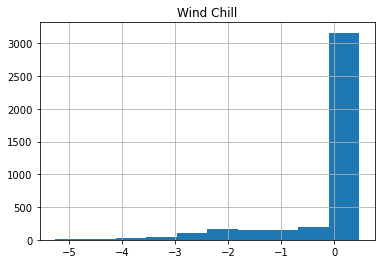

In [121]:
bike_data.hist(column="Wind Chill")

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [98]:
from sklearn.metrics import accuracy_score
X = bike_data.drop(labels=['Berri1', 'Maisonneuve_2', 'Maisonneuve_1'],axis=1)
y_Berri1 = bike_data['Berri1']
y_Maisonneuve_2 = bike_data['Maisonneuve_2']
y_Maisonneuve_1 = bike_data['Maisonneuve_1']

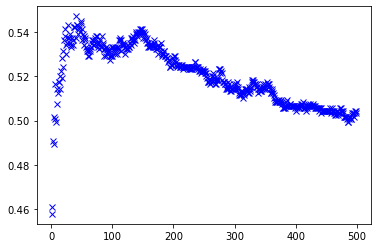

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Berri1, test_size = 0.25) # 0.08 to try
for i in range(1,500,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',p=1)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    #print('training set accuracy', acc_train)
    #print('test set accuracy', acc_test)
    plt.plot(i,acc_test,"bx")

In [100]:
knn.classes_

array(['0-100', '100-500', '1000-2000', '2000-4000', '4000-8000',
       '500-1000', '8000+'], dtype=object)

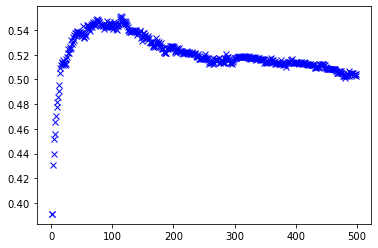

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Maisonneuve_2, test_size = 0.25) 
for i in range(1,500,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',p=1)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    #print('training set accuracy', acc_train)
    #print('test set accuracy', acc_test)
    plt.plot(i,acc_test,"bx")

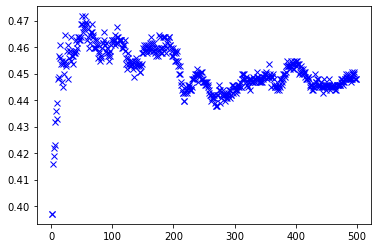

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Maisonneuve_1, test_size = 0.25) 
for i in range(1,500,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',p=1)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    #print('training set accuracy', acc_train)
    #print('test set accuracy', acc_test)
    plt.plot(i,acc_test,"bx")